In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [245]:
df = pd.read_csv("Data1.csv")
if df.shape[1] == 2:
  df.insert(loc = 1, column="x2", value=[0.5]*len(df))
if "Sl" in df:
  df.drop("Sl", axis=1)
df.rename(columns={'z': 'y'}, inplace = True)

In [246]:
d = df.shape[1]-1
sum_array = np.zeros((d,d))

def sum_of_invers():
  global sum_array
  for i in range(len(df)):
    xi = np.array((df.iloc[i][:d],))
    xi_T = xi.T
    x2_2 = xi*xi_T
    # print(xi.shape)
    sum_array = sum_array + x2_2
sum_of_invers()
invers_sum_array = np.linalg.inv(sum_array)
# invers_sum_array*sum_array
# print(sum_array)
# print(invers_sum_array@sum_array)
invers_sum_array.shape


(2, 2)

In [247]:
df

,x,x2,y
0,0.1,0.5,8.298133
1,0.2,0.5,4.919282
2,0.3,0.5,4.145139
3,0.4,0.5,6.850788
4,0.5,0.5,6.375323
...,...,...,...
95,9.6,0.5,28.420698
96,9.7,0.5,27.984652
97,9.8,0.5,30.336851
98,9.9,0.5,30.376285


In [248]:
sigma_xiyi = np.zeros((1,d))
# sum_array1.shape
def xi_yi_sigma():
  global sigma_xiyi
  for i in range(len(df)):
    xi = np.array((df.iloc[i][:d],))*(df["y"][i])
    # print(xi.shape)
    # print(xi)
    sigma_xiyi = sigma_xiyi + xi
    # print(sigma_xiyi)
xi_yi_sigma()

sigma_xiyi = sigma_xiyi.T


In [249]:
w = invers_sum_array@sigma_xiyi
# w.shape
w

array([[ 2.38406007],
       [11.36157425]])

In [250]:
output = []
def out_put_work():
  global output
  for i in range(len(df)):
    xi = np.array((df.iloc[i][:d],))
    # print(xi, "         ", xi.shape)
    xT = xi.T
    y = w.T@xi.T
    output.append(y[0][0])
out_put_work()
# output

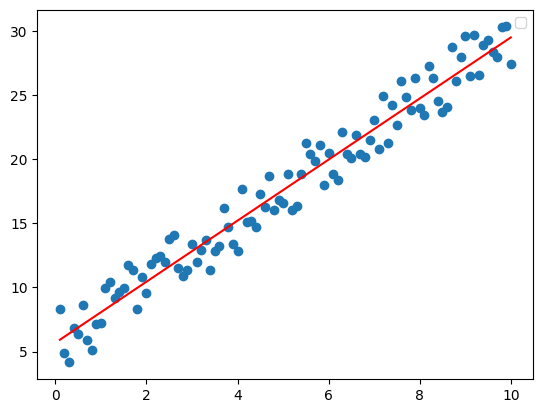

In [251]:
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], output, color = "red")
plt.legend()
plt.show()

In [252]:
# Create a Linear Regression model
model = LinearRegression()

In [253]:
# Fit the model to the data
model.fit(df[["x"]], df[["y"]])

LinearRegression()

In [254]:
pred=model.predict(np.exp(df[['x']]))
# pred

In [255]:
# Make predictions
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



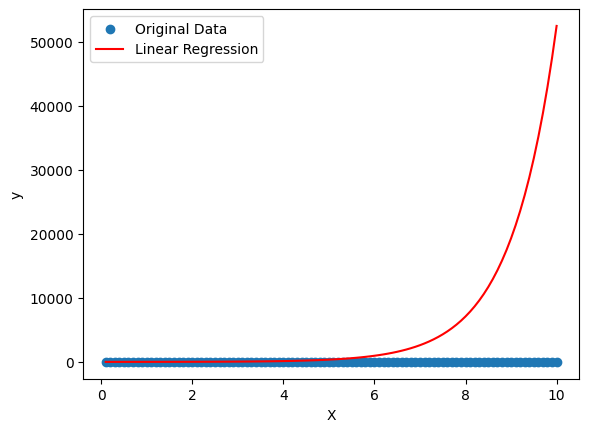

In [256]:
# Plot the original data and the regression line
plt.scatter(df["x"], df["y"], label='Original Data')
plt.plot(df['x'], pred, 'r-', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [257]:
pred.shape

(100, 1)

In [258]:

def MSE(data):
  if type(data) == np.ndarray and data.shape != 1:
    data = data.flatten()
  error_sum = 0
  for i in range(len(df)):
    error_sum += (df["y"][i] - data[i])**2
  return error_sum/len(df)
print(MSE(output))
MSE(pred)

2.0785254017773265


151885621.8610408

In [259]:
def MAE(data):
  if type(data) == np.ndarray and data.shape != 1:
    data = data.flatten()
  error_sum = 0
  for i in range(len(df)):
    error_sum += abs(df["y"][i] - data[i])
    # print(error_sum)
  return error_sum/len(df)
print(MAE(output))
MAE(pred)


1.2805559784291463


5505.889114613055

In [260]:
def RMSE(data):
  return MSE(data)**0.5

print(RMSE(output))
RMSE(pred)

1.4417091945941547


12324.18848691632

In [261]:
def TSS(data):
  tss = 0
  y=list(df['y'])
  data_mean = 0
  if type(data) == np.ndarray and data.shape != 1:
    data = data.flatten()
  for i in data:
    data_mean += i
  data_mean = data_mean/len(data)
  for j in range(len(y)):
    tss += (y[j] - data_mean)**2
  return tss/len(y)

print(TSS(output))
TSS(pred)

49.438308937850145


30314864.380723465

In [262]:
def R_Square(data):
  return 1 - (MSE(data)/TSS(data))

print(R_Square(output))
R_Square(pred)

0.9579571905586358


-4.010268888341834

In [263]:
def gredientDecent(eta):
    gredient = 0
    w_old = np.array(([0.0]*d,))
    print(w_old.shape)
    threshold = 1e-3
#     w = np.array(([1e-6]*d,))
#     while (w - w_old)
    for e in range(308):
        for i in range(len(df)):
          Xi_vector = np.array((df.iloc[i][:d],))
          # print(df['y'][i] - Xi_vector@w_old.T)
          # print(w_old.shape)
          gredient += ((df['y'][i] - Xi_vector@w_old.T)*(-Xi_vector))
        # print(gredient)
        w = w_old - eta*gredient*(2/len(df))
        # print(w)
        w_old = w
    return w

print(gredientDecent(0.009).T)

(1, 2)
[[ 5.27855143]
 [19.23256515]]


In [264]:
fig = px.scatter(x=output, y=output - df["y"], labels={'x': 'Predicted Values', 'y': 'Residuals'}, title='Residual Plot')
fig.show()